"\n\ny['tot_film_index'] = y['tot_film']/y['tot_film'][0]*100\ny['nrOfWins_tot_index'] = y['nrOfWins_tot']/y['nrOfWins_tot'][0]*100\n\n"

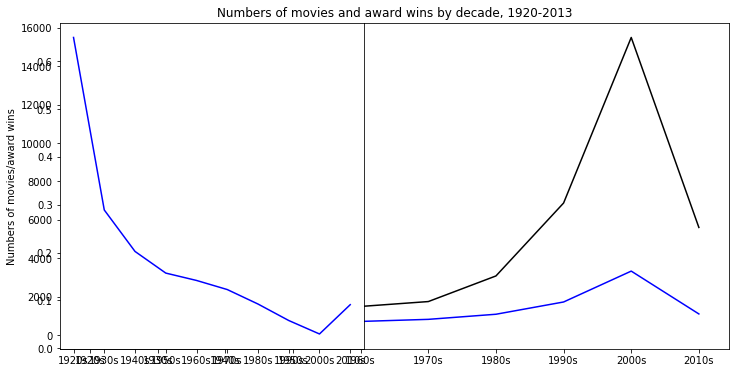

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import seaborn as sns
import math
from data_gen import gen_df

# Importing data and making new dataframe
filename = 'imdb.csv'
df = gen_df(filename)
imdb = df.copy()

imdb['nrOfWins_tot'] = imdb.groupby('decade')['nrOfWins'].transform(lambda x : x.sum())

imdb['nrOfWins_share'] = imdb['nrOfWins']/imdb['nrOfWins_tot']*100
imdb['nrOfWins_share_avg'] = imdb.groupby('decade')['nrOfWins_share'].transform(lambda x: x.mean())


# Generate variable that counts number of observation/movies in each year
imdb['temp']=1
imdb['tot_film'] = imdb.groupby('decade')['temp'].transform(lambda x : x.sum())
del imdb['temp']


y = pd.DataFrame(imdb.groupby('decade')['nrOfWins_tot'].first())
y['nrOfWins_share'] = imdb.groupby('decade')['nrOfWins_share_avg'].first()
y['tot_film'] = imdb.groupby('decade')['tot_film'].first()
y.reset_index(inplace=True)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(y['decade'], y['tot_film'], color='blue', label='Number of movies')
ax1.plot(y['decade'], y['nrOfWins_tot'], color='black', label='Numbers of award wins')
ax1.legend(loc='upper left');
ax1.set_ylabel('Numbers of movies/award wins')
ax1.set_title(f'Numbers of movies and award wins by decade, 1920-2013')

ax2 = fig.add_subplot(1,2,1)
ax2.plot(y['decade'], y['nrOfWins_share'], color='blue', label='Number of movies')




"""
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    
    # I-curve
    ax.plot(x1_vec_IC,x2_vec_IC, color='blue', label=f'I-curve, u0={u0:.0f}')
    
    # Budget lines
    ax.plot(x1_vec_BC,x2_vec_BC, color='black', label='Budget line')
    ax.plot(x1_vec_BC,x2_vec_BC2, color='black', linestyle='dashed', label='Too high expenditure')
    ax.plot(x1_vec_BC,x2_vec_BC3, color='black', linestyle='dotted', label='Too low expenditure')
"""
"""

y['tot_film_index'] = y['tot_film']/y['tot_film'][0]*100
y['nrOfWins_tot_index'] = y['nrOfWins_tot']/y['nrOfWins_tot'][0]*100

"""


#y

#imdb.head(-10)


